# **CONJUNTO DE EJERCICIOS**

## 1. Determine el orden de la mejor aproximación para las siguientes funciones, usando la Serie de Taylor y el Polinomio de Lagrange:

 1. $$\frac{1}{25x^2+1},x_0=0$$

 2. $$arctan(x),x_0=1$$

* **Escriba las fórmulas de los diferentes polinomios**
* **Grafique las diferentes aproximaciones**

 1. $$\frac{1}{25x^2+1},x_0=0$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from sympy import symbols, diff, lambdify, atan


# Función 1: 1/(25x^2 + 1)
def f1(x):
    return 1/(25*x**2 + 1)

# Punto de expansión para Taylor
x0 = 0

# Rangos de valores para la gráfica
x_vals = np.linspace(-0.5, 0.5, 400)

**Aproximacion con Serie de Taylor**

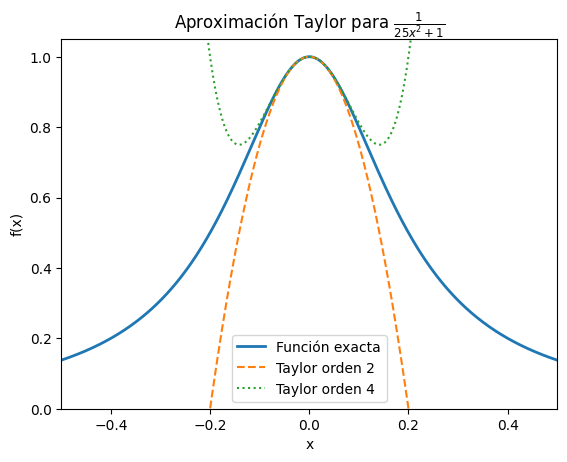

In [3]:
# Calculos simbólicos para Taylor
x = symbols('x')
f1_sym = 1/(25*x**2 + 1)

# Taylor de orden 2
f1_prime = diff(f1_sym, x)
f1_double_prime = diff(f1_prime, x)
taylor_2 = f1_sym.subs(x, x0) + f1_prime.subs(x, x0)*(x-x0) + f1_double_prime.subs(x, x0)/2*(x-x0)**2
taylor_2_func = lambdify(x, taylor_2)

# Taylor de orden 4
f1_triple_prime = diff(f1_double_prime, x)
f1_quad_prime = diff(f1_triple_prime, x)
taylor_4 = taylor_2 + f1_triple_prime.subs(x, x0)/6*(x-x0)**3 + f1_quad_prime.subs(x, x0)/24*(x-x0)**4
taylor_4_func = lambdify(x, taylor_4)

# Gráfico de las funciones
plt.plot(x_vals, f1(x_vals), label='Función exacta', linewidth=2)
plt.plot(x_vals, taylor_2_func(x_vals), '--', label='Taylor orden 2')
plt.plot(x_vals, taylor_4_func(x_vals), ':', label='Taylor orden 4')
plt.title('Aproximación Taylor para $\\frac{1}{25x^2+1}$')
plt.xlim(-0.5, 0.5)
plt.ylim(0, 1.05)
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

**Aproximación con Polinomio de Lagrange**

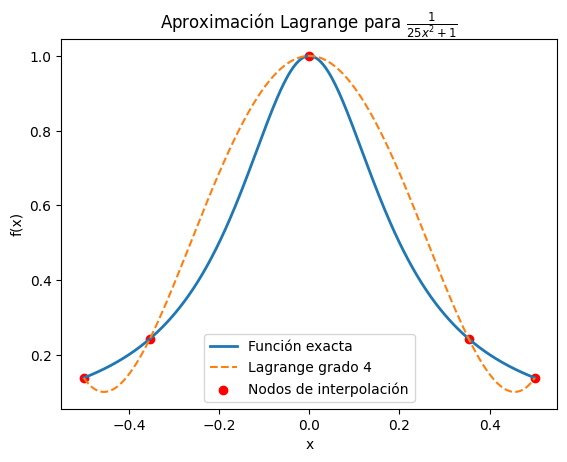

In [4]:
# Puntos para Lagrange (interpolación en nodos de Chebyshev)
n_points = 5
cheb_nodes = np.cos(np.linspace(0, np.pi, n_points)) * 0.5  # Escalado a [-0.5, 0.5]
lagrange_poly = lagrange(cheb_nodes, f1(cheb_nodes))

# Gráfico de Lagrange
plt.plot(x_vals, f1(x_vals), label='Función exacta', linewidth=2)
plt.plot(x_vals, lagrange_poly(x_vals), '--', label=f'Lagrange grado {n_points-1}')
plt.scatter(cheb_nodes, f1(cheb_nodes), color='red', label='Nodos de interpolación')
plt.title('Aproximación Lagrange para $\\frac{1}{25x^2+1}$')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

2. $$arctan(x),x_0=1$$

In [5]:
# Función 2: arctan(x)
def f2(x):
    return np.arctan(x)

# Punto de expansión para Taylor
x0 = 1

# Rangos de valores para la gráfica
x_vals_arctan = np.linspace(0, 2, 400)

**Aproximación con Serie de Taylor**

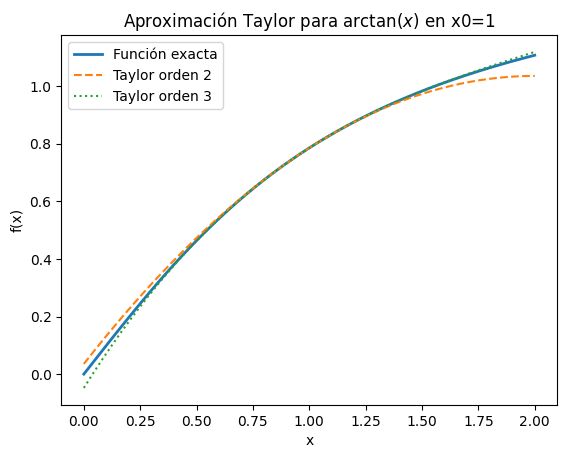

In [7]:
# Calculos simbólicos para Taylor
f2_sym = atan(x)

# Taylor de orden 2
f2_prime = diff(f2_sym, x)
f2_double_prime = diff(f2_prime, x)
taylor_2_arctan = f2_sym.subs(x, x0) + f2_prime.subs(x, x0)*(x-x0) + f2_double_prime.subs(x, x0)/2*(x-x0)**2
taylor_2_arctan_func = lambdify(x, taylor_2_arctan)

# Taylor de orden 3
f2_triple_prime = diff(f2_double_prime, x)
taylor_3_arctan = taylor_2_arctan + f2_triple_prime.subs(x, x0)/6*(x-x0)**3
taylor_3_arctan_func = lambdify(x, taylor_3_arctan)

# Gráfico de Taylor
plt.plot(x_vals_arctan, f2(x_vals_arctan), label='Función exacta', linewidth=2)
plt.plot(x_vals_arctan, taylor_2_arctan_func(x_vals_arctan), '--', label='Taylor orden 2')
plt.plot(x_vals_arctan, taylor_3_arctan_func(x_vals_arctan), ':', label='Taylor orden 3')
plt.title('Aproximación Taylor para $\\arctan(x)$ en x0=1')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

**Aproximación con Polinomio de Lagrange**

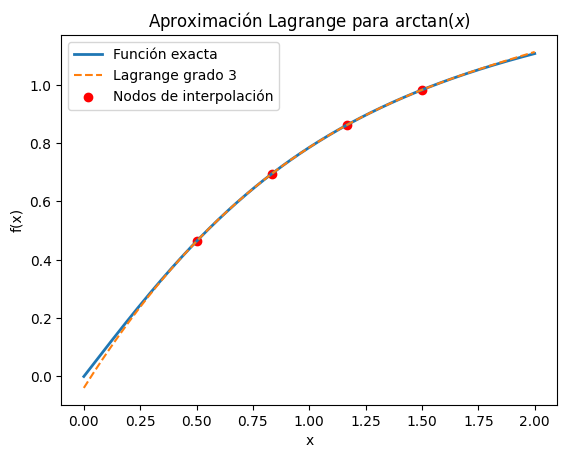

In [8]:
# Puntos para Lagrange
n_points_arctan = 4
x_nodes = np.linspace(0.5, 1.5, n_points_arctan)
lagrange_poly_arctan = lagrange(x_nodes, f2(x_nodes))

# Gráfico de Lagrange
plt.plot(x_vals_arctan, f2(x_vals_arctan), label='Función exacta', linewidth=2)
plt.plot(x_vals_arctan, lagrange_poly_arctan(x_vals_arctan), '--', label=f'Lagrange grado {n_points_arctan-1}')
plt.scatter(x_nodes, f2(x_nodes), color='red', label='Nodos de interpolación')
plt.title('Aproximación Lagrange para $\\arctan(x)$')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## **Comparación de métodos**

Se calcula el error cuadrático medio para saber cual método es mejor de la siguiente manera:

In [9]:
# Primera función
error_taylor2 = np.mean((f1(x_vals) - taylor_2_func(x_vals))**2)
error_taylor4 = np.mean((f1(x_vals) - taylor_4_func(x_vals))**2)
error_lagrange = np.mean((f1(x_vals) - lagrange_poly(x_vals))**2)

print(f"Errores para 1/(25x^2+1):")
print(f"Taylor orden 2: {error_taylor2:.2e}")
print(f"Taylor orden 4: {error_taylor4:.2e}")
print(f"Lagrange grado {n_points-1}: {error_lagrange:.2e}")

# Segunda función
error_taylor2_arctan = np.mean((f2(x_vals_arctan) - taylor_2_arctan_func(x_vals_arctan))**2)
error_taylor3_arctan = np.mean((f2(x_vals_arctan) - taylor_3_arctan_func(x_vals_arctan))**2)
error_lagrange_arctan = np.mean((f2(x_vals_arctan) - lagrange_poly_arctan(x_vals_arctan))**2)

print(f"\nErrores para arctan(x):")
print(f"Taylor orden 2: {error_taylor2_arctan:.2e}")
print(f"Taylor orden 3: {error_taylor3_arctan:.2e}")
print(f"Lagrange grado {n_points_arctan-1}: {error_lagrange_arctan:.2e}")

Errores para 1/(25x^2+1):
Taylor orden 2: 5.11e+00
Taylor orden 4: 1.20e+02
Lagrange grado 4: 1.16e-02

Errores para arctan(x):
Taylor orden 2: 5.60e-04
Taylor orden 3: 1.09e-04
Lagrange grado 3: 6.25e-05
